In [27]:
from pathlib import Path
import plotly.express as px
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def read_image(path,bbox):
    return np.array(Image.open("../output" / path))[bbox[0]:bbox[1],bbox[2]:bbox[3]]

methods = [
    #("/test/normal_alpha_30000","3DGS 500k"),
    #("/test/normal_alpha_10000","3DGS 50k"),
    #("/test/texture_scores2_7000","Textured 50k"),
    #("_depth/test/texture_scores2_30000","Textured+Depth 50k (mine)"),
    ("/test/texture_scores2_10000","Textured 50k"),
    ("_textured_10000/test/texture_scores2_1000","Textured+Training 50k"),
]

scenes = {
    "chair_background2_slow": [
        ("00014",(0,800,0,800)),
        ("00014",(475,575,275,375))
    ],
    "mic_slow": [
        ("00006",(0,800,0,800)),
        ("00006",(150,250,600,700))
    ],
    "ship_slow": [
        ("00003",(0,800,0,800)),
        ("00003",(275,425,200,350))
    ],
    "livingroom_slow": [
        ("00000",(0,480,0,480)),
        ("00000",(50,150,225,325)),
        ("00000",(300,350,275,325))
    ]
}

out_images = []
for scene_name, image_names in scenes.items():
    
    for image_name, bbox in image_names:
        image_row = []
        image_row.append(read_image(Path(scene_name+methods[0][0]) / f"renders/{image_name}_gt.png", bbox))

        for path,name in methods:
            
            if scene_name=="livingroom_slow":
                suff = "_100"
            else:
                suff = "_50"
            if "texture" in path:
                print(path,(Path("../output/"+scene_name+path+suff)/"num_gaussians").read_text())
                path = Path(scene_name+path+suff) / f"renders/{image_name}_texture.png"
            else:
                print(path,(Path("../output/"+scene_name+path)/"num_gaussians").read_text())
                path = Path(scene_name+path) / f"renders/{image_name}.png"
            image_row.append(read_image(path,bbox))
        out_images.append(image_row)

/test/normal_alpha_30000 502504
/test/normal_alpha_10000 55151
_depth/test/texture_scores2_30000 44079
_textured_10000/test/texture_scores2_1000 55151
/test/normal_alpha_30000 502504
/test/normal_alpha_10000 55151
_depth/test/texture_scores2_30000 44079
_textured_10000/test/texture_scores2_1000 55151
/test/normal_alpha_30000 485960
/test/normal_alpha_10000 64042
_depth/test/texture_scores2_30000 44888
_textured_10000/test/texture_scores2_1000 64042
/test/normal_alpha_30000 485960
/test/normal_alpha_10000 64042
_depth/test/texture_scores2_30000 44888
_textured_10000/test/texture_scores2_1000 64042
/test/normal_alpha_30000 493864


/test/normal_alpha_10000 38671
_depth/test/texture_scores2_30000 36595
_textured_10000/test/texture_scores2_1000 38671
/test/normal_alpha_30000 493864
/test/normal_alpha_10000 38671
_depth/test/texture_scores2_30000 36595
_textured_10000/test/texture_scores2_1000 38671
/test/normal_alpha_30000 241612
/test/normal_alpha_10000 54160
_depth/test/texture_scores2_30000 52919
_textured_10000/test/texture_scores2_1000 54160
/test/normal_alpha_30000 241612
/test/normal_alpha_10000 54160
_depth/test/texture_scores2_30000 52919
_textured_10000/test/texture_scores2_1000 54160
/test/normal_alpha_30000 241612
/test/normal_alpha_10000 54160
_depth/test/texture_scores2_30000 52919
_textured_10000/test/texture_scores2_1000 54160


In [12]:
len(out_images[0])

5

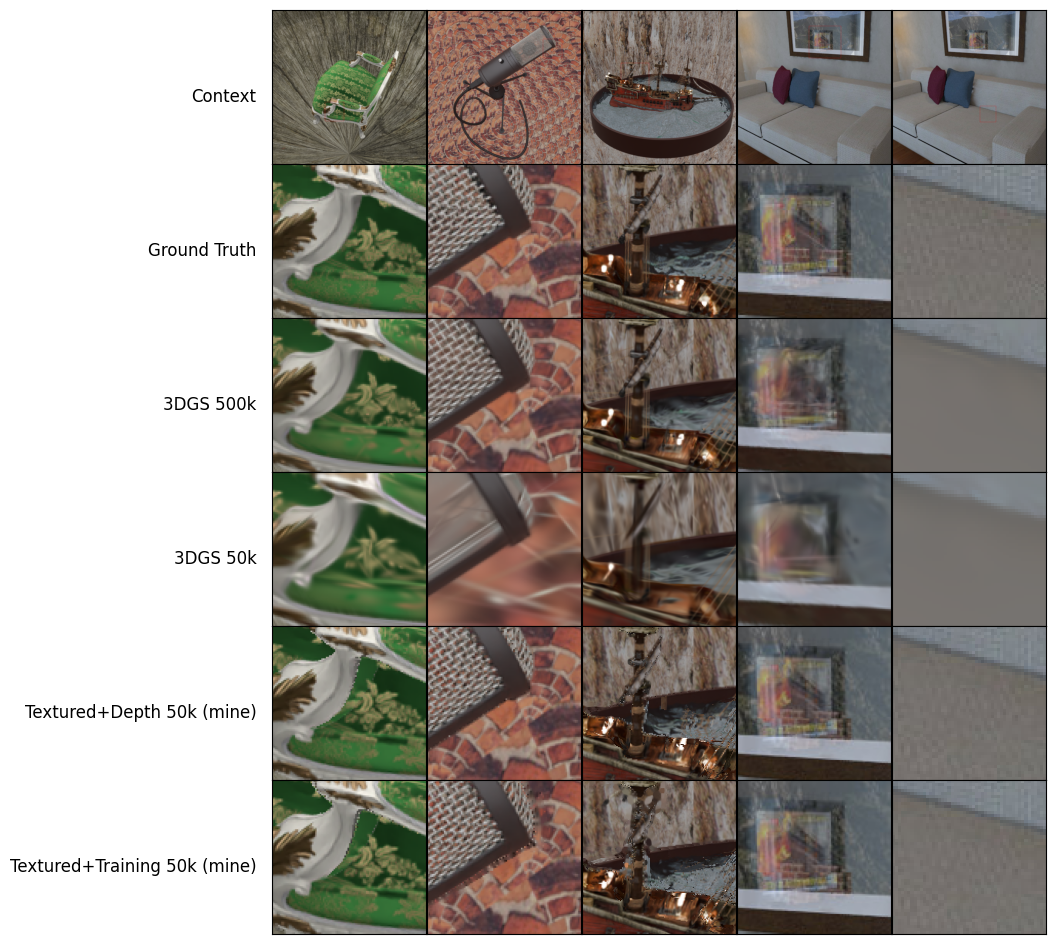

In [28]:
from matplotlib.patches import Ellipse, Rectangle 

fig, axs = plt.subplots(len(out_images[0])+1, 5, figsize=(10, 12))

big_imgs = [0,2,4,6,6]
small_imgs = [1,3,5,7,8]


for j,img_ind in enumerate(big_imgs):
    image = out_images[img_ind][0]
    axs[0,j].imshow(image)
    
    rb = list(scenes.values())[img_ind//2][0][1]
    r = list(scenes.values())[img_ind//2][1][1]
    if j==4:
        r = list(scenes.values())[img_ind//2][2][1]
    
    rect = Rectangle(xy=(r[2]-rb[2],r[0]-rb[0]), width=r[1]-r[0],height=r[3]-r[2],edgecolor='r',fc="None", lw=0.1)
    axs[0,j].add_patch(rect)
    
for i in range(len(out_images[0])):
    for j,img_ind in enumerate(small_imgs):
        image = out_images[img_ind][i]
        axs[i+1,j].imshow(image)

# for i,row in enumerate(out_images):
#     for j,image in enumerate(row):
#         axs[j,i].imshow(image)
        
#         if i%2==0 and i<7:
#             rb = list(scenes.values())[i//2][0][1]
#             r = list(scenes.values())[i//2][1][1]
            
#             rect = Rectangle(xy=(r[2]-rb[2],r[0]-rb[0]), width=r[1]-r[0],height=r[3]-r[2],edgecolor='r',fc="None", lw=0.1)
#             axs[j,i].add_patch(rect)
            
#             if i==6:
#                 rb = list(scenes.values())[i//2][0][1]
#                 r = list(scenes.values())[i//2][2][1]            
#                 rect = Rectangle(xy=(r[2]-rb[2],r[0]-rb[0]), width=r[1]-r[0],height=r[3]-r[2],edgecolor='r',fc="None", lw=0.1)
#                 axs[j,i].add_patch(rect)

for j in range(len(out_images[0])+1):
    if j==0:
        axs[j,0].set_title("Context",loc="right", x=-0.1, y=0.35)
    elif j==1:
        axs[j,0].set_title("Ground Truth",loc="right", x=-0.1, y=0.35)
    else:
        axs[j,0].set_title(methods[j-2][1],loc="right", x=-0.1, y=0.35)
        
# Remove tick marks and axis labels
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig("../figures/qual1.pdf", dpi=800,bbox_inches="tight", pad_inches=0)
# Show the figure
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../output/chair_background2_slow/train/normal_alpha_2000/renders/00005_gt.png'

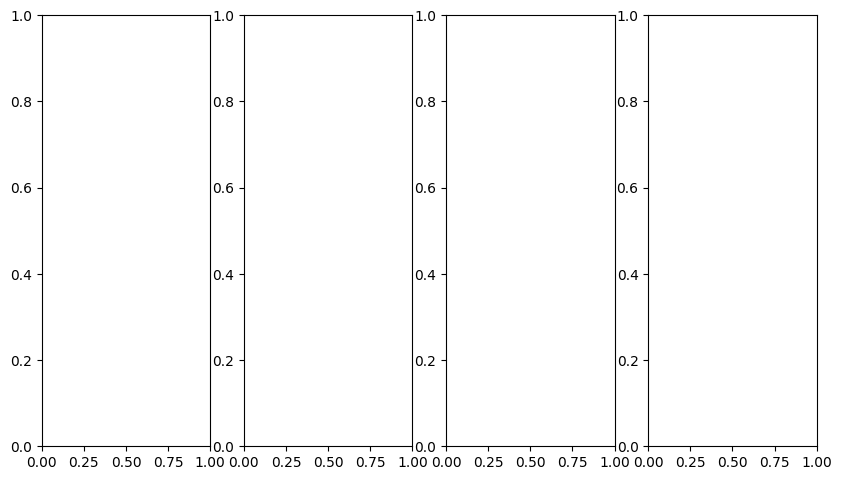

In [3]:
fig, axs = plt.subplots(1,4, figsize=(10, 5.6))

axs[0].imshow(np.array(Image.open("../output/chair_background2_slow/train/normal_alpha_2000/renders/00005_gt.png")))
axs[1].imshow(np.array(Image.open("../output/mic_slow/train/normal_alpha_2000/renders/00005_gt.png")))
axs[2].imshow(np.array(Image.open("../output/ship_slow/train/normal_alpha_2000/renders/00001_gt.png")))
axs[3].imshow(np.array(Image.open("../output/livingroom_slow/train/normal_alpha_2000/renders/00016_gt.png"))[:,:480])
axs[0].set_title("Chair")
axs[0].set_title("Microphone")
axs[0].set_title("Ship")
axs[0].set_title("Livingroom")

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig("../figures/scenes.pdf", dpi=800,bbox_inches="tight", pad_inches=0)
# Show the figure
plt.show()